<a href="https://colab.research.google.com/github/M-FA-16/AI-PROJECT/blob/main/%E0%B8%AA%E0%B8%B3%E0%B9%80%E0%B8%99%E0%B8%B2%E0%B8%82%E0%B8%AD%E0%B8%87_Ex_Project_Horse_Human.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Example CNN

หากต้องการทดสอบการรัน ให้ดาวโหลด dataset ตามลิงค์ดังนี้

Train data: https://drive.google.com/file/d/1ur1TvCAFOY4dx_hGPi7nJMkA38RUZ6AC

Test data: https://drive.google.com/file/d/1CO9ucFiaRZCBcSFCxXrQcDmPAvyYoQl9

และนำไปวางใน drive ของคุณเอง และเปลี่ยน path ให้ตรงตำแหน่งของ drive คุณ

##1. การนำเข้าไลบรารีที่จำเป็น

In [ ]:
import os
import zipfile
import tensorflow as tf
from tensorflow.keras import utils
from tensorflow.keras.metrics import Precision, Recall, F1Score
import matplotlib.pyplot as plt
import numpy as np
from google.colab import files

*   **`import os`**: ไลบรารี `os` ใช้สำหรับจัดการไฟล์และไดเรกทอรี เช่น การตรวจสอบว่ามีไฟล์อยู่หรือไม่, การสร้างไดเรกทอรี, การอ่านรายชื่อไฟล์ในไดเรกทอรี
*   **`import zipfile`**: ไลบรารี `zipfile` ใช้สำหรับจัดการไฟล์ ZIP เช่น การแตกไฟล์ ZIP
*   **`import tensorflow as tf`**: ไลบรารี `tensorflow` เป็นไลบรารีหลักสำหรับการสร้างและฝึกโมเดล Deep Learning
*   **`from tensorflow.keras import utils`**:  นำเข้า `utils` ซึ่งมีฟังก์ชันอำนวยความสะดวกในการจัดการข้อมูล เช่น การโหลดชุดข้อมูลรูปภาพ (`image_dataset_from_directory`)
*   **`import matplotlib.pyplot as plt`**: ไลบรารี `matplotlib` ใช้สำหรับวาดกราฟ เพื่อแสดงผลลัพธ์ต่างๆ เช่น ความแม่นยำ (accuracy) และค่า loss
*   **`import numpy as np`**: ไลบรารี `numpy` ใช้สำหรับการคำนวณทางคณิตศาสตร์ที่เกี่ยวข้องกับอาร์เรย์ (arrays) ซึ่งเป็นโครงสร้างข้อมูลพื้นฐานของ TensorFlow
*   **`from google.colab import files`**: (เฉพาะเมื่อรันบน Google Colab) ใช้สำหรับอัปโหลด/ดาวน์โหลดไฟล์จากเครื่อง local ไปยัง Colab
*   **`from google.colab import drive`**: เป็นการ import ไลบรารี `drive` จาก `google.colab` ซึ่งใช้สำหรับเชื่อมต่อ Google Colab กับ Google Drive ของเรา ทำให้เราสามารถเข้าถึงไฟล์ที่เก็บไว้ใน Google Drive ได้โดยตรง


##2. การเชื่อมต่อกับ Google Drive และแตกไฟล์ ZIP

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

# Train dataset path in Google Drive
local_zip = '/content/drive/MyDrive/horse-or-human.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp/horse-or-human')

# Test dataset path in Google Drive
local_zip = '/content/drive/MyDrive/horse-or-human.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp/test-horse-or-human')
zip_ref.close()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


from google.colab import drive
drive.mount('/content/drive')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


*   **`drive.mount('/content/drive')`**:  คำสั่งนี้เป็นการ "mount" หรือเชื่อมต่อ Google Drive เข้ากับ Colab notebook  ที่ path `/content/drive` หลังจากรันคำสั่งนี้ เราจะสามารถเข้าถึงไฟล์ใน Google Drive ได้เหมือนกับเป็นไฟล์ที่อยู่ในเครื่อง Colab (จะต้องอนุญาตสิทธิการเข้าถึง Drive)
*   **`local_zip = ...`**: กำหนดตัวแปร `local_zip` ให้เก็บ path ของไฟล์ ZIP ที่อยู่ใน Google Drive (ทั้งชุดข้อมูล train และ test)
*   **`zip_ref = zipfile.ZipFile(local_zip, 'r')`**:  สร้าง object `zip_ref` เพื่อเปิดไฟล์ ZIP ในโหมดอ่าน ('r')
*   **`zip_ref.extractall('/tmp/horse-or-human')`**: แตกไฟล์ ZIP ทั้งหมดไปไว้ที่ `/tmp/horse-or-human` (และ `/tmp/test-horse-or-human` สำหรับชุดข้อมูล test) ใน Colab
*   **`zip_ref.close()`**: ปิดไฟล์ ZIP หลังจากแตกไฟล์เสร็จ


##3. การกำหนด Path ของไดเรกทอรี และแสดงตัวอย่างไฟล์

In [ ]:
# Directory with our training horse pictures
train_horse_dir = os.path.join('/tmp/horse-or-human/horses')
# Directory with our training human pictures
train_human_dir = os.path.join('/tmp/horse-or-human/humans')

# Directory with our training horse pictures
test_horse_dir = os.path.join('/tmp/test-horse-or-human/horses')
test_human_dir = os.path.join('/tmp/test-horse-or-human/humans')

train_horse_names = os.listdir('/tmp/horse-or-human/horses')
print('Directory: horse-or-human/horses')
print(train_horse_names[:5], '\n')

train_human_names = os.listdir('/tmp/horse-or-human/humans')
print('Directory: horse-or-human/humans')
print(train_human_names[:5], '\n')

test_horse_hames = os.listdir('/tmp/test-horse-or-human/horses')
print('Directory: test-horse-or-human/horses')
print(test_horse_hames[:5], '\n')

test_human_names = os.listdir('/tmp/test-horse-or-human/humans')
print('Directory: test-horse-or-human/humans')
print(test_human_names[:5], '\n')

Directory: horse-or-human/horses
['horse05-3.png', 'horse39-2.png', 'horse41-6.png', 'horse08-3.png', 'horse45-3.png'] 

Directory: horse-or-human/humans
['human15-04.png', 'human16-22.png', 'human13-05.png', 'human08-21.png', 'human06-04.png'] 

Directory: test-horse-or-human/horses
['horse05-3.png', 'horse39-2.png', 'horse41-6.png', 'horse08-3.png', 'horse45-3.png'] 

Directory: test-horse-or-human/humans
['human15-04.png', 'human16-22.png', 'human13-05.png', 'human08-21.png', 'human06-04.png'] 



*   **`train_horse_dir = ...`**: กำหนด path ของไดเรกทอรีที่เก็บรูปภาพ "ม้า" สำหรับ train
*   **`train_human_dir = ...`**: กำหนด path ของไดเรกทอรีที่เก็บรูปภาพ "คน" สำหรับ train
*    **`test_horse_dir = ...`**: กำหนด path ของไดเรกทอรีที่เก็บรูปภาพ "ม้า" สำหรับ test
*   **`test_human_dir = ...`**: กำหนด path ของไดเรกทอรีที่เก็บรูปภาพ "คน" สำหรับ test
*   **`train_horse_names = os.listdir(...)`**: ใช้ `os.listdir()` เพื่ออ่านรายชื่อไฟล์ทั้งหมดในไดเรกทอรีรูปภาพ "ม้า" สำหรับ train และเก็บไว้ในตัวแปร `train_horse_names`
*   **`print(train_horse_names[:5], '\n')`**: แสดงรายชื่อ 5 ไฟล์แรก เพื่อให้เห็นตัวอย่าง
*   ทำซ้ำแบบเดียวกันสำหรับรูปภาพ "คน" และชุดข้อมูล test



##4. กำหนดขนาดรูปภาพและ Input Shape

In [ ]:
IMAGE_SIZE = (150, 150)
INPUT_SHAPE = (150, 150, 3)

* **`IMAGE_SIZE = (150, 150)`**: กำหนดขนาดรูปภาพที่จะใช้เป็น input ของโมเดล  ในที่นี้คือ 150x150 พิกเซล
* **`INPUT_SHAPE = (150, 150, 3)`**:  กำหนดรูปร่าง (shape) ของ input ที่จะป้อนให้กับโมเดล  
    *   150, 150 คือ ขนาดกว้างและสูงของรูปภาพ
    *   3 คือ จำนวนช่องสี (channel)  โดยทั่วไปคือ RGB (แดง, เขียว, น้ำเงิน)


##5. โหลดชุดข้อมูลด้วย `image_dataset_from_directory`

In [ ]:
train_dataset = utils.image_dataset_from_directory(
    '/tmp/horse-or-human',
    image_size=IMAGE_SIZE,
    batch_size=128,
    label_mode='binary'
    )

test_dataset = utils.image_dataset_from_directory(
    '/tmp/test-horse-or-human',
    image_size=IMAGE_SIZE,
    batch_size=128,
    label_mode='binary',
    shuffle=False
    )

Found 1027 files belonging to 2 classes.
Found 1027 files belonging to 2 classes.


*   **`utils.image_dataset_from_directory(...)`**:  เป็นฟังก์ชันที่สะดวกมากจาก Keras  ใช้สำหรับโหลดชุดข้อมูลรูปภาพจากไดเรกทอรีโดยตรง
*   **`/tmp/horse-or-human`**:  Path ของไดเรกทอรีหลักของชุดข้อมูล train (ซึ่งมี subdirectory `horses` และ `humans`)
*   **`image_size=IMAGE_SIZE`**:  ปรับขนาดรูปภาพทั้งหมดให้เป็นขนาดที่กำหนด (150x150)
*   **`batch_size=128`**:  กำหนดขนาด batch  คือ จำนวนรูปภาพที่จะถูกประมวลผลพร้อมกันในแต่ละรอบการ train
*   **`label_mode='binary'`**:  กำหนดว่า label (คำตอบ) จะเป็นแบบ binary (0 หรือ 1)  ในที่นี้คือ 0 แทน "ม้า" และ 1 แทน "คน" (กรณีมี class มากกว่า 2 กำหนดเป็น `label_mode='categorical'`)
* โหลด test_dataset ในลักษณะเดียวกัน โดยเพิ่ม `shuffle=False` ให้โหลดทดสอบโดยไม่ต้องสุ่ม เพื่อการสร้าง confusion matrix ที่ถูกต้อง (ตามลำดับของ label)

##6. สร้างโมเดล Convolutional Neural Network (CNN)

In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.Input(shape=INPUT_SHAPE),
    tf.keras.layers.Conv2D(16, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

*   **`tf.keras.models.Sequential(...)`**:  สร้างโมเดลแบบ Sequential  คือ โมเดลที่มี layers ต่อกันเป็นลำดับ
*   **`tf.keras.Input(shape=INPUT_SHAPE)`**:  กำหนด input layer  โดยระบุ shape ของ input
*   **`tf.keras.layers.Conv2D(16, (3,3), activation='relu')`**:  สร้าง Convolutional layer
    *   `16` คือ จำนวน filters (หรือ kernels)
    *   `(3,3)` คือ ขนาดของ filter (3x3)
    *   `activation='relu'` คือ ใช้ ReLU (Rectified Linear Unit) เป็น activation function
*   **`tf.keras.layers.MaxPooling2D(2, 2)`**:  สร้าง Max Pooling layer  เพื่อลดขนาด feature maps  โดยเลือกค่าสูงสุดในแต่ละกรอบขนาด 2x2
*   ทำซ้ำ Convolutional และ Max Pooling layers อีก 4 ครั้ง  โดยเพิ่มจำนวน filters ขึ้นเรื่อยๆ
*   **`tf.keras.layers.Flatten()`**:  Flatten layer ทำหน้าที่แปลง feature maps ที่เป็น 2D (หรือ 3D) ให้เป็น 1D vector  เพื่อเตรียมป้อนให้กับ Dense layer
*   **`tf.keras.layers.Dense(512, activation='relu')`**:  Dense layer (Fully connected layer)  มี 512 neurons และใช้ ReLU activation
*   **`tf.keras.layers.Dense(1, activation='sigmoid')`**:  Output layer  มี 1 neuron  และใช้ Sigmoid activation  เพราะเราต้องการ output ที่เป็นค่าระหว่าง 0 ถึง 1 (ความน่าจะเป็นที่จะเป็น "คน")

**ข้อสำคัญ**

* กรณีมี class มากกว่า 2 class ต้องปรับ output layer เป็น ```tf.keras.layers.Dense(NUM_CLASSES, activation='softmax'```
* Output Layer: Dense layer สุดท้ายต้องมีจำนวน neurons เท่ากับจำนวน classes และใช้ softmax activation. softmax จะให้ output เป็น probability distribution คือ ค่าความน่าจะเป็นของแต่ละ class รวมกันได้ 1.

##7. แสดง Summary ของโมเดล

In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 148, 148, 16)        │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 74, 74, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 72, 72, 32)          │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 36, 36, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 34, 34, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 17, 17, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 15, 15, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 7, 7, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 5, 5, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 2, 2, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │         131,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │             513 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 229,537 (896.63 KB)

 Trainable params: 229,537 (896.63 KB)

 Non-trainable params: 0 (0.00 B)

*   **`model.summary()`**:  แสดงโครงสร้างของโมเดล  จำนวน parameters ในแต่ละ layer  และจำนวน parameters ทั้งหมด


##8. Compile โมเดล

In [ ]:
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

*   **`model.compile(...)`**:  กำหนดค่าต่างๆ ที่จำเป็นก่อนการ train
*   **`loss='binary_crossentropy'`**:  ใช้ Binary Crossentropy เป็น loss function  เหมาะสำหรับปัญหา binary classification (0 หรือ 1)
*   **`optimizer='adam'`**:  ใช้ Adam optimizer  เป็น algorithm ที่นิยมสำหรับการปรับ weights ของโมเดล
*   **`metrics=['accuracy']`**:  กำหนดให้วัดผล accuracy (ความแม่นยำ) ระหว่างการ train

**ข้อสำคัญ**
* ส่วนของ `loss`:
* กรณีใช้ `label_mode='categorical'` (one-hot encoded labels), loss ต้องเป็น `'categorical_crossentropy'`


##9. Train โมเดล

In [ ]:
EPOCHS = 6

history = model.fit(
    train_dataset,
    epochs=EPOCHS,
    verbose=1)

Epoch 1/6
9/9 ━━━━━━━━━━━━━━━━━━━━ 14s 563ms/step - accuracy: 0.5185 - loss: 10.0292
Epoch 2/6
9/9 ━━━━━━━━━━━━━━━━━━━━ 13s 403ms/step - accuracy: 0.7112 - loss: 0.5498
Epoch 3/6
9/9 ━━━━━━━━━━━━━━━━━━━━ 4s 316ms/step - accuracy: 0.8526 - loss: 0.3578
Epoch 4/6
9/9 ━━━━━━━━━━━━━━━━━━━━ 6s 402ms/step - accuracy: 0.8996 - loss: 0.2433
Epoch 5/6
9/9 ━━━━━━━━━━━━━━━━━━━━ 4s 321ms/step - accuracy: 0.9143 - loss: 0.2086
Epoch 6/6
9/9 ━━━━━━━━━━━━━━━━━━━━ 5s 320ms/step - accuracy: 0.9514 - loss: 0.1389


*   **`EPOCHS = 10`**:  กำหนดจำนวน epochs  คือ จำนวนรอบที่โมเดลจะเรียนรู้จากชุดข้อมูลทั้งหมด
*   **`model.fit(...)`**:  เริ่ม train โมเดล
    *   **`train_dataset`**:  ชุดข้อมูลสำหรับ train
    *   **`epochs=EPOCHS`**:  จำนวน epochs
    *   **`verbose=1`**:  แสดง progress bar ระหว่างการ train


##10. แสดงกราฟ Training และ Validation Accuracy

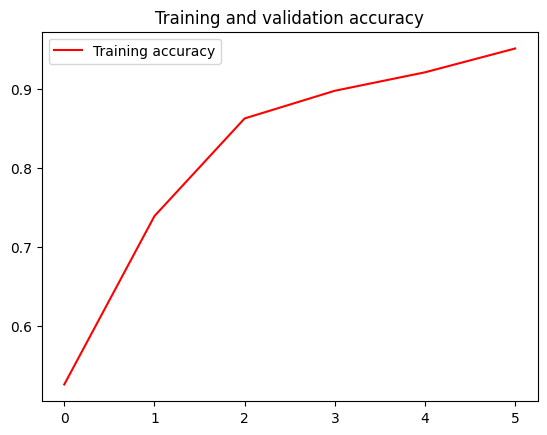

<Figure size 640x480 with 0 Axes>

In [ ]:
acc = history.history['accuracy']
loss = history.history['loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()
plt.show()

*   **`acc = history.history['accuracy']`**: ดึงค่า accuracy จาก training history
*   **`loss = history.history['loss']`**: ดึงค่า loss จาก training history
*   **`epochs = range(len(acc))`**: สร้าง list ของ epochs
*   **`plt.plot(...)`**: วาดกราฟ accuracy ของ training set
*   **`plt.title(...)`**: ตั้งชื่อกราฟ
*   **`plt.legend(...)`**: แสดง legend
*   **`plt.figure()`**: สร้าง figure ใหม่
*   **`plt.show()`**: แสดงกราฟ

##11. ประเมินโมเดลบน Test Set

In [ ]:
loss, acc = model.evaluate(test_dataset, verbose=2)
print("Trained model, accuracy: {:5.2f}%".format(100 * acc))

9/9 - 6s - 645ms/step - accuracy: 0.9192 - loss: 0.1704
Trained model, accuracy: 91.92%


*   **`model.evaluate(test_dataset, verbose=2)`**:  ประเมินโมเดลบนชุดข้อมูล test  เพื่อดูว่าโมเดลมีความสามารถในการทำนายข้อมูลที่ไม่เคยเห็นมาก่อนได้ดีแค่ไหน
*   **`print(...)`**:  แสดง accuracy บน test set

###ประเมินผล Precision, Recall, F1-Score

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

In [ ]:
predictions = model.predict(test_dataset)
predictions = np.round(predictions).flatten()  # Convert probabilities to 0 or 1

true_labels = np.concatenate([y for x, y in test_dataset], axis=0)
true_labels = true_labels.flatten()

cm = confusion_matrix(true_labels, predictions)
# Extract TP, FP, FN, TN from confusion matrix
TN, FP, FN, TP = cm.ravel()

precision = TP / (TP + FP)
recall = TP / (TP + FN)
f1_score = 2 * (precision * recall) / (precision + recall)

print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-score: {f1_score:.2f}")

9/9 ━━━━━━━━━━━━━━━━━━━━ 3s 318ms/step
Precision: 0.99
Recall: 0.85
F1-score: 0.92


* **`from sklearn.metrics import classification_report, confusion_matrix`**: import ฟังก์ชัน `classification_report` และ `confusion_matrix` จาก `sklearn.metrics`
    *   `classification_report` จะคำนวณ precision, recall, F1-score, และ support (จำนวน samples ในแต่ละ class) ให้โดยอัตโนมัติ
    *   `confusion_matrix` จะสร้าง confusion matrix
* **`import seaborn as sns`**: เพิ่มการ import `seaborn` `seaborn` เป็นไลบรารีที่สร้างขึ้นบน `matplotlib` ทำให้การสร้าง heatmap สวยงามและง่ายขึ้น
* **`predictions = model.predict(test_dataset)`**:  ใช้โมเดลทำนาย (predict) บน test set  ผลลัพธ์ที่ได้จะเป็น probabilities (ค่าระหว่าง 0 ถึง 1)
* **`predictions = np.round(predictions).flatten()`**: แปลง probabilities ให้เป็น 0 หรือ 1 โดยใช้ `np.round()`  และ `.flatten()` ทำให้เป็น 1D array
* **`true_labels = np.concatenate([y for x, y in test_dataset], axis=0)`**: ดึง labels ที่ถูกต้อง (true labels) จาก `test_dataset`
   *   `test_dataset` จะ return เป็น batches, ต้องใช้ `np.concatenate` รวม labels จากทุก batches เข้าด้วยกัน
   *   `axis=0` รวมตามแนวแกนตั้ง (row-wise)
* **`true_labels = true_labels.flatten()`**: ทำให้ `true_labels` กลายเป็น array 1 มิติ

* **`print(classification_report(true_labels, predictions))`**:  แสดง classification report (precision, recall, F1-score, * **`cm = confusion_matrix(true_labels, predictions)`**: สร้าง confusion matrix
* **`print("Confusion Matrix:")`**
    **`print(cm)`**: แสดง confusion matrix
* **`TN, FP, FN, TP = cm.ravel()`**:  unpack confusion matrix  โดย:
    *   `TN`: True Negatives (ทำนายว่าเป็น "ม้า" และถูกต้อง)
    *   `FP`: False Positives (ทำนายว่าเป็น "คน" แต่จริงๆ เป็น "ม้า")
    *   `FN`: False Negatives (ทำนายว่าเป็น "ม้า" แต่จริงๆ เป็น "คน")
    *   `TP`: True Positives (ทำนายว่าเป็น "คน" และถูกต้อง)
* **คำนวณ Precision, Recall, F1-score**:
    *   `precision = TP / (TP + FP)`
    *   `recall = TP / (TP + FN)`
    *   `f1_score = 2 * (precision * recall) / (precision + recall)`
* **`print(...)`**: แสดงค่าที่คำนวณได้


###Confusion matrix

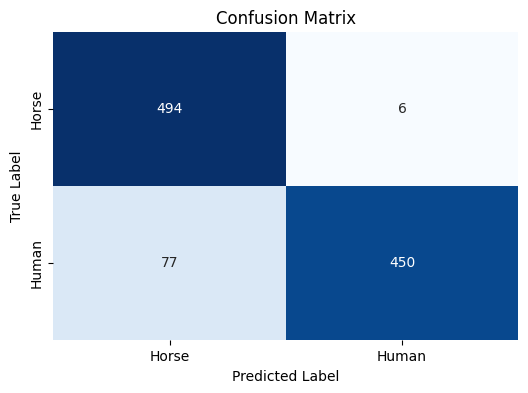

In [ ]:
conf_mat = confusion_matrix(true_labels, predictions)

class_names = ['Horse', 'Human']
plt.figure(figsize=(6, 4))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

* **`xticklabels=class_names, yticklabels=class_names`**:  ในส่วนของการสร้าง heatmap (`sns.heatmap(...)`) ได้แก้ไข `xticklabels` และ `yticklabels` ให้เป็น `['Horse', 'Human']` แทนที่จะเป็นตัวเลข 0 และ 1  เพื่อให้สอดคล้องกับ labels ของเรา (ม้า และ คน) ทำให้ heatmap อ่านง่ายขึ้น (**กรณี multiple class ให้เป็น list เรียงลำดับ class ให้ตรง**)

*   **`plt.figure(figsize=(6, 4))`**:  กำหนดขนาดของ figure (heatmap) ที่จะแสดง
*   **`sns.heatmap(...)`**:  เป็นฟังก์ชันหลักในการสร้าง heatmap
    *   `conf_mat`: คือ confusion matrix ที่เราคำนวณได้
    *   `annot=True`: แสดงตัวเลขในแต่ละช่องของ heatmap
    *   `fmt='d'` : กำหนด format ของตัวเลขให้เป็น integer (decimal)
    *   `cmap='Blues'` : ใช้ colormap สีน้ำเงิน
    *   `cbar=False` : ไม่แสดง color bar ด้านข้าง
    *   `xticklabels` และ `yticklabels`: กำหนด labels ของแกน x และ y ตามลำดับ
*   **`plt.xlabel(...)`, `plt.ylabel(...)`, `plt.title(...)`**:  ตั้งชื่อแกน x, แกน y, และ title ของ heatmap

จะได้ heatmap ที่แสดง confusion matrix ซึ่งจะบอกว่าโมเดลทำนายถูก/ผิด ในแต่ละ class (ม้า/คน) เป็นจำนวนเท่าไหร่ ทำให้เราเห็นภาพรวมของประสิทธิภาพของโมเดลได้ชัดเจน และเข้าใจได้ง่ายกว่าการดูตัวเลขดิบๆ


##12. บันทึกและโหลดโมเดล

In [ ]:
saved_model_path = '/content/drive/MyDrive/AI/cst_train_horh_v1.keras'
model.save(saved_model_path)


*   **`saved_model_path = ...`**: กำหนด path ที่จะบันทึกโมเดล
*   **`model.save(saved_model_path)`**: บันทึกโมเดล


In [ ]:
new_model = tf.keras.models.load_model(saved_model_path)

new_model.summary()

loss, acc = new_model.evaluate(test_dataset, verbose=2)
print('Restored model, accuracy: {:5.2f}%'.format(100 * acc))

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 148, 148, 16)        │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 74, 74, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 72, 72, 32)          │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 36, 36, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 34, 34, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 17, 17, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 15, 15, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 7, 7, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 5, 5, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 2, 2, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │         131,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │             513 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 688,613 (2.63 MB)

 Trainable params: 229,537 (896.63 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 459,076 (1.75 MB)

9/9 - 5s - 572ms/step - accuracy: 0.9192 - loss: 0.1704
Restored model, accuracy: 91.92%


*   **`new_model = tf.keras.models.load_model(saved_model_path)`**: โหลดโมเดลที่บันทึกไว้
*   **`new_model.summary()`**: แสดง summary ของโมเดลที่โหลดมา
*   **`loss, acc = new_model.evaluate(test_dataset, verbose=2)`**: ประเมิน accuracy ของโมเดลที่โหลดมา (ควรได้ค่าเท่ากับก่อนบันทึก)